In [2]:
import Pkg
Pkg.update
using Pkg

In [4]:
for p in ["CSV","DataFrames", "RDatasets","FileIO"]
    Pkg.add(p)
end
using CSV, DataFrames, DelimitedFiles

   Updating registry at `C:\Users\acers\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
No Changes to `C:\Users\acers\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\acers\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\acers\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\acers\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\acers\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\acers\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\acers\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\acers\.julia\environments\v1.5\Manifest.toml`


In [7]:
P =CSV.File("programminglanguages.csv") |> DataFrame

,year,language
,Int64,String31
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


In [11]:
function language_created_year(P, language::String)
    loc = findfirst(P[:,2].==language)
    return P[loc,1]
end

language_created_year (generic function with 1 method)

In [13]:
language_created_year(P, "Python")

1991

In [14]:
language_created_year(P, "Julia")

2012

In [15]:
function language_created_year(P, language::String)
    loc = findfirst(lowercase.(P[:,2]).==lowercase.(language))
    return P[loc,1]
end

language_created_year (generic function with 1 method)

In [16]:
language_created_year(P, "PYTHON")

1991

In [17]:
# Запись данных в CSV-файл:
CSV.write("programming_languages_data2.csv", P)


"programming_languages_data2.csv"

In [20]:
Tx = readdlm("programminglanguages.csv", ',')


74×2 Array{Any,2}:
     "year"  "language"
 1951        "Regional Assembly Language"
 1952        "Autocode"
 1954        "IPL"
 1955        "FLOW-MATIC"
 1957        "FORTRAN"
 1957        "COMTRAN"
 1958        "LISP"
 1958        "ALGOL 58"
 1959        "FACT"
 1959        "COBOL"
 1959        "RPG"
 1962        "APL"
    ⋮        
 2003        "Scala"
 2005        "F#"
 2006        "PowerShell"
 2007        "Clojure"
 2009        "Go"
 2010        "Rust"
 2011        "Dart"
 2011        "Kotlin"
 2011        "Red"
 2011        "Elixir"
 2012        "Julia"
 2014        "Swift"

In [21]:

# Пример записи данных в текстовый файл с разделителем ',':
writedlm("programming_languages_data.txt", Tx, ',')


In [22]:
dict = Dict{Integer, Vector{String}}()
dict2 = Dict()

Dict{Any,Any}()

In [24]:
for i = 1:size(P,1)
    year, lang = P[i,:]
    if year in keys(dict)
        dict[year]= push!(dict[year],lang)
    else
        dict[year] = [lang]
    end
end

In [25]:
dict[2003]

2-element Array{String,1}:
 "Groovy"
 "Scala"

## DataFrames

In [26]:
df = DataFrame(year= P[:,1], language = P[:,2])

,year,language
,Int64,String31
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


In [27]:
df[!,:year]

73-element Array{Int64,1}:
 1951
 1952
 1954
 1955
 1957
 1957
 1958
 1958
 1959
 1959
 1959
 1962
 1962
    ⋮
 2003
 2005
 2006
 2007
 2009
 2010
 2011
 2011
 2011
 2011
 2012
 2014

In [29]:
using RDatasets

In [30]:
iris = dataset("datasets", "iris")


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [31]:
typeof(iris)

DataFrame

In [32]:
describe(iris)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String,UInt8}"


In [33]:
a = missing
typeof(a)
a +1

missing

In [34]:
foods = ["apple", "cucumber", "tomato", "banana"]

4-element Array{String,1}:
 "apple"
 "cucumber"
 "tomato"
 "banana"

In [35]:
calories =[missing, 47,22, 105]
typeof(calories)

Array{Union{Missing, Int64},1}

In [37]:
Pkg.add("Statistics")
using Statistics

  Resolving package versions...
No Changes to `C:\Users\acers\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\acers\.julia\environments\v1.5\Manifest.toml`


In [38]:
mean(calories)

missing

In [39]:
mean(skipmissing(calories))

58.0

In [40]:
prices =[0.85, 1.6, 0.8, 0.6]

4-element Array{Float64,1}:
 0.85
 1.6
 0.8
 0.6

In [41]:
dataframe_prices = DataFrame(item=foods, price=prices)

,item,price
,String,Float64
1,apple,0.85
2,cucumber,1.6
3,tomato,0.8
4,banana,0.6


In [43]:
dataframe_calories =DataFrame(item=foods, price=prices)

,item,price
,String,Float64
1,apple,0.85
2,cucumber,1.6
3,tomato,0.8
4,banana,0.6


In [47]:
#DF = join(dataframe_calories, dataframe_prices, on=:item)

In [48]:
import Pkg
Pkg.add("ImageIO")

  Resolving package versions...
  Installed RangeArrays ──── v0.3.2
  Installed ImageMetadata ── v0.9.8
  Installed ProgressMeter ── v1.7.2
  Installed ImageIO ──────── v0.5.9
  Installed ImageBase ────── v0.1.5
  Installed ImageAxes ────── v0.6.10
  Installed AbstractFFTs ─── v1.2.1
  Installed TiffImages ───── v0.5.5
  Installed StackViews ───── v0.1.1
  Installed Netpbm ───────── v1.1.0
  Installed OpenEXR ──────── v0.3.2
  Installed PkgVersion ───── v0.1.1
  Installed Graphics ─────── v1.1.2
  Installed PNGFiles ─────── v0.3.17
  Installed IndirectArrays ─ v1.0.0
  Installed ImageCore ────── v0.9.4
  Installed Imath_jll ────── v3.1.2+0
  Installed MappedArrays ─── v0.4.1
  Installed OpenEXR_jll ──── v3.1.1+0
  Installed MosaicViews ──── v0.3.4
  Installed PaddedViews ──── v0.5.11
  Installed AxisArrays ───── v0.4.6
Updating `C:\Users\acers\.julia\environments\v1.5\Project.toml`
  [82e4d734] + ImageIO v0.5.9
Updating `C:\Users\acers\.julia\environments\v1.5\Manifest.toml`
  [621f497

In [95]:
X1=  load("julialogo.png")

LoadError: [91mUndefVarError: load not defined[39m

In [96]:
@show typeof(X1)
@show size(X1)

LoadError: [91mUndefVarError: X1 not defined[39m

In [97]:
import Pkg
Pkg.add("DataFrames")
Pkg.add("Statistics")
using DataFrames
using CSV
Pkg.add("Plots")

  Resolving package versions...
No Changes to `C:\Users\acers\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\acers\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\acers\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\acers\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\acers\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\acers\.julia\environments\v1.5\Manifest.toml`


In [98]:
houses = CSV.File("houses.csv") |> DataFrame


,street,city,zip,state,beds,baths
,String,String15,Int64,String3,Int64,Int64
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2


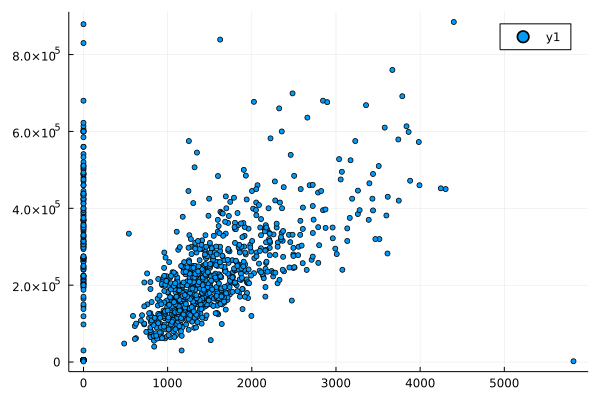

In [99]:
using Plots
plot(size=(500, 500), leg=false)

x =houses[!,:sq__ft]
y =houses[!,:price]
scatter(x,y, markersize=3)

In [72]:
filter_houses = houses[houses[!,:sq__ft].>0,:]

,street,city,zip,state,beds,baths
,String,String15,Int64,String3,Int64,Int64
1,3526 HIGH ST,SACRAMENTO,95838,CA,2,1
2,51 OMAHA CT,SACRAMENTO,95823,CA,3,1
3,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1
4,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1
5,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1
6,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1
7,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2
8,2561 19TH AVE,SACRAMENTO,95820,CA,3,1
9,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2


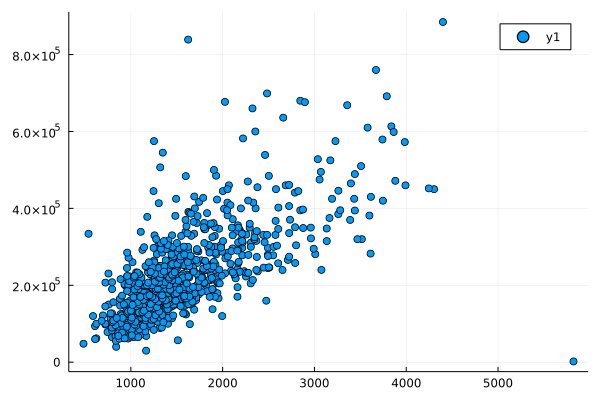

In [73]:
x = filter_houses[!,:sq__ft]
y = filter_houses[!,:price]
scatter(x, y)

In [78]:
using Statistics


In [79]:
grb = groupby(filter_houses,:type)
combine(grb, filter_houses->mean(filter_houses[!, :price]))

,type,x1
,String15,Float64
1,Residential,234802.0
2,Condo,134213.0
3,Multi-Family,224535.0


In [92]:
import Pkg
Pkg.add("Clustering")
using Clustering

  Resolving package versions...
No Changes to `C:\Users\acers\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\acers\.julia\environments\v1.5\Manifest.toml`


In [100]:
X = filter_houses[[:latitude,:longitude]]


LoadError: [91mMethodError: no method matching getindex(::DataFrame, ::Array{Symbol,1})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  getindex(::DataFrame, ::AbstractArray{T,1} where T, [91m::Union{AbstractString, Signed, Symbol, Unsigned}[39m) at C:\Users\acers\.julia\packages\DataFrames\JZ7x5\src\dataframe\dataframe.jl:498[39m
[91m[0m  getindex(::DataFrame, ::AbstractArray{T,1}, [91m::Colon[39m) where T at C:\Users\acers\.julia\packages\DataFrames\JZ7x5\src\dataframe\dataframe.jl:575[39m
[91m[0m  getindex(::DataFrame, ::AbstractArray{T,1}, [91m::Union{Colon, Regex, AbstractArray{T,1} where T, All, Between, Cols, InvertedIndex}[39m) where T at C:\Users\acers\.julia\packages\DataFrames\JZ7x5\src\dataframe\dataframe.jl:552[39m
[91m[0m  ...[39m

In [101]:
X =X'

LoadError: [91mUndefVarError: X not defined[39m

In [102]:
k= length(unique(filter_houses[!,:zip]))

66